In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
from mpl_toolkits.axes_grid1 import ImageGrid
import random
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

Using TensorFlow backend.


In [0]:
train =  pd.read_json('/content/drive/My Drive/kaggle/data/train/train.json')
test =   pd.read_json('/content/drive/My Drive/kaggle/data/test/test.json')

In [0]:
labels = ['Iceberg', 'Non-iceberg']
explode = (0, 0.02)
iceberg_count = len(train[train.is_iceberg==1])
non_iceberg_count = len(train[train.is_iceberg==0])
total_count = iceberg_count + non_iceberg_count
perc = [ (iceberg_count/total_count), (non_iceberg_count/total_count) ]
plt.axis('equal')
plt.pie(perc, explode=explode, labels=labels, autopct='%.00f%%')

([<matplotlib.patches.Wedge at 0x7f0730b09128>,
 [Text(0.10540651230641589, 1.0949381111110335, 'Iceberg'),
  Text(-0.10732299434835135, -1.1148460767675974, 'Non-iceberg')],
 [Text(0.05749446125804502, 0.5972389696969272, '47%'),
  Text(-0.05941094329998021, -0.6171469353534914, '53%')])

In [0]:
def plot_bands(df, ia):
    df = df[df['inc_angle'] == ia]
    i = int(np.sqrt(len(df))//1 * 2)
    j = int(2*len(df) // i + 1)
    fig = plt.figure(1, figsize=(24,24))
    grid = ImageGrid(fig, 111, nrows_ncols=(i, j), axes_pad=0.05)
    for i, (id_num,band1, band2, inc_angle, iceberg) in enumerate(df.values):
        # plot band 1
        ax = grid[(i*2)]
        band1_sample = band1
        band1_sample = np.array(band1_sample).reshape(75, 75)
        ax.imshow(band1_sample / 75.)
        ax.text(10, 4, 'Id: %s %s' % (id_num, "Band_1"), color='k', backgroundcolor='m', alpha=0.8)
        ax.text(10, 10, 'Incidence Angle: (%.4f)' % inc_angle, color='w', backgroundcolor='k', alpha=0.8)
        ax.text(10, 16, 'Is Iceberg: %s' % iceberg, color='k', backgroundcolor='w', alpha=0.8)
        ax.axis('on')
        # plot band 2
        ax = grid[(i*2)+1]
        band2_sample = band2
        band2_sample = np.array(band2_sample).reshape(75, 75)
        ax.imshow(band2_sample / 75.)
        ax.text(10, 4, 'Id: %s %s' % (id_num, "Band_2"), color='k', backgroundcolor='m', alpha=0.8)
        ax.text(10, 10, 'Incidence Angle: (%.4f)' % inc_angle, color='w', backgroundcolor='k', alpha=0.8)
        ax.text(10, 16, 'Is Iceberg: %s' % iceberg, color='k', backgroundcolor='w', alpha=0.8)
        ax.axis('on')

In [0]:
train

id  ... is_iceberg
0     dfd5f913  ...          0
1     e25388fd  ...          0
2     58b2aaa0  ...          1
3     4cfc3a18  ...          0
4     271f93f4  ...          0
...        ...  ...        ...
1599  04e11240  ...          0
1600  c7d6f6f8  ...          0
1601  bba1a0f1  ...          0
1602  7f66bb44  ...          0
1603  9d8f326c  ...          0

[1604 rows x 5 columns]

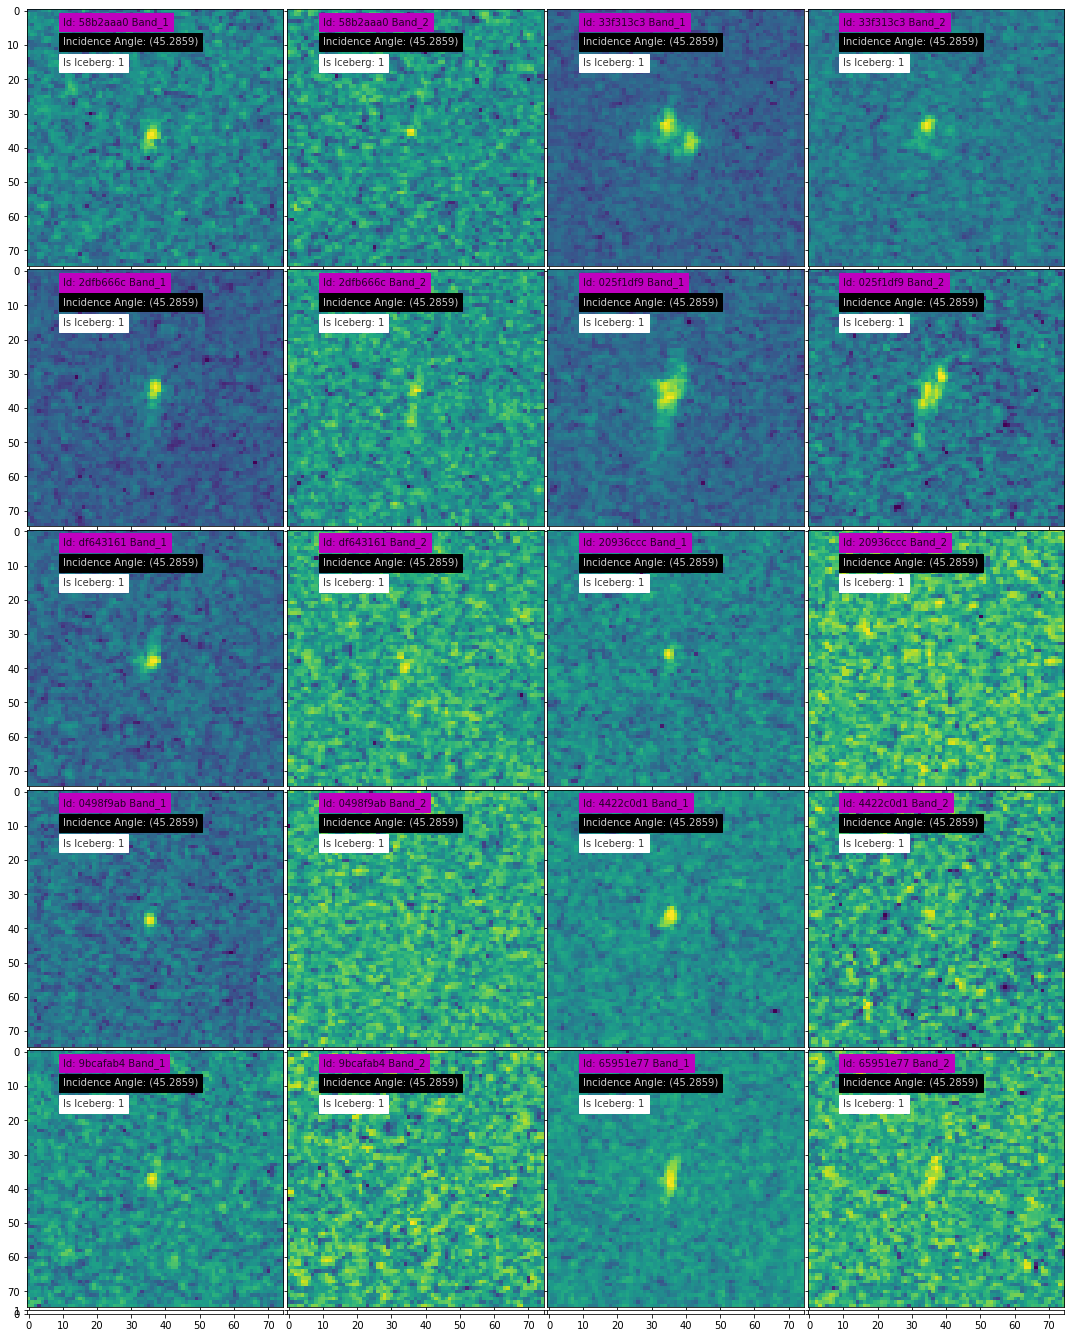

In [0]:
plot_bands(train, 45.2859)

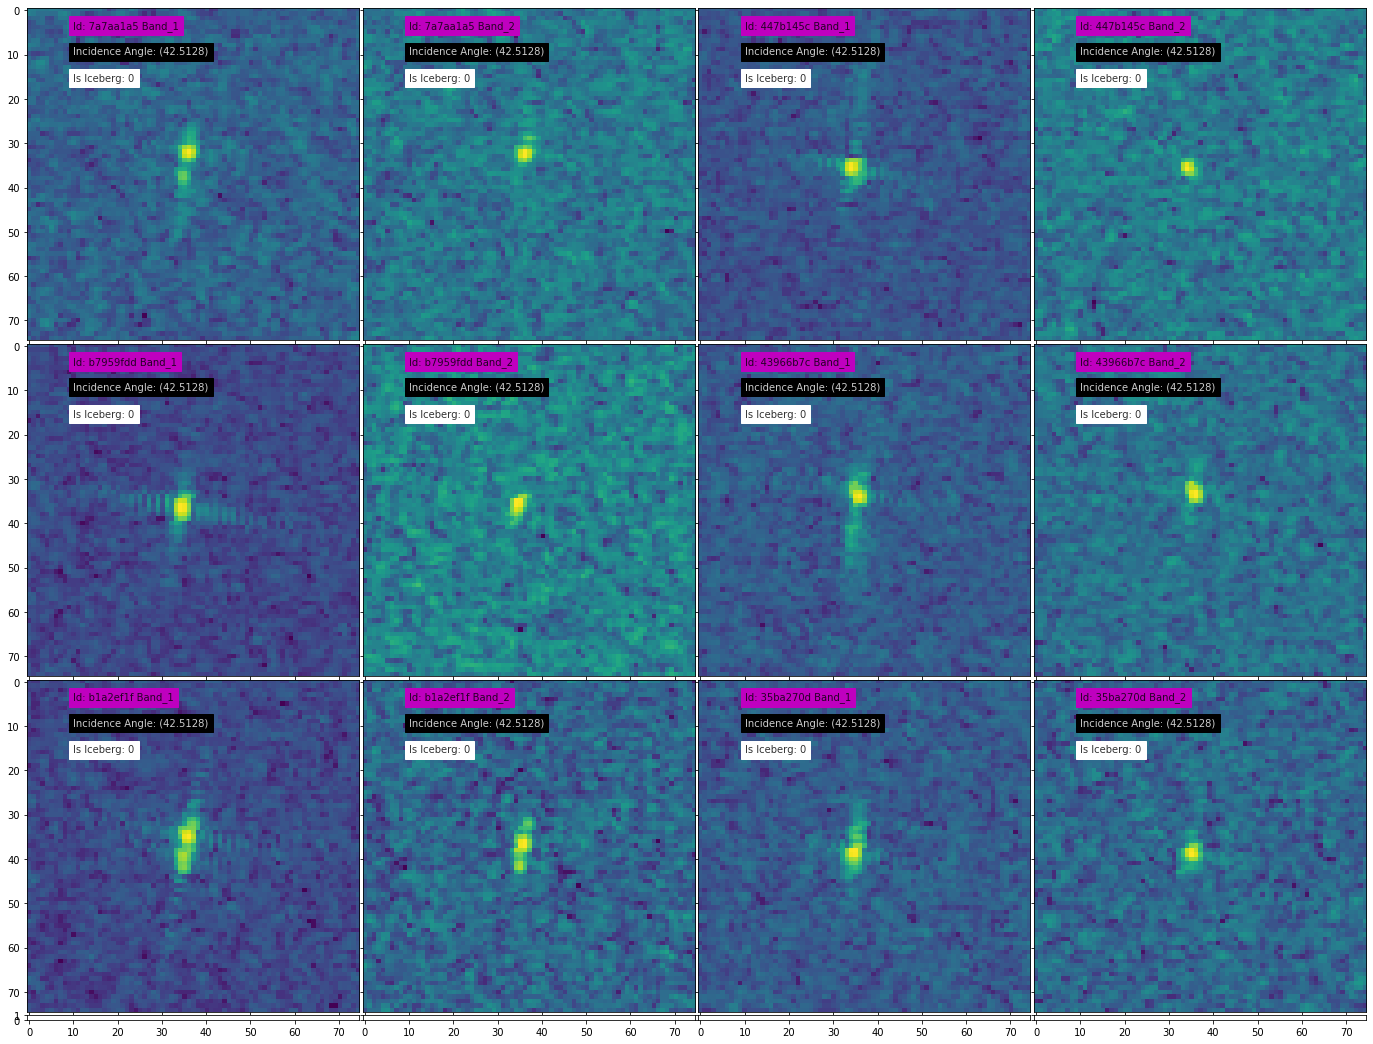

In [0]:
plot_bands(train, 42.5128)